In [1]:
suppressPackageStartupMessages({
    library(Rsamtools)
    library(GenomicFiles)
    library(GenomicRanges)
    library(data.table)
    library(rtracklayer)
    library(RColorBrewer)
    library(foreach)
    library(doParallel)
    library(ggplot2)
});
registerDoParallel(cores=7);
genomef = "~/bin/genomes/hg19/hg19.2bit";
options(repr.plot.width=3, repr.plot.height=3, jupyter.plot_mimetypes = "image/svg+xml");

load('../data/CoPRO_hg19_dm6_paperfreeze/CoPRO_AllMerge_Pooled.Rdata');
load('../data/newK562_CoPROcalls.Rdata');
load('../data/newK562_CoPRO_maxTSB.Rdata');

In [2]:
countbases = function(x) {
    result = matrix(F, nrow=4, ncol=11);
    result[1,] = x == 'A';
    result[2,] = x == 'C';
    result[3,] = x == 'G';
    result[4,] = x == 'T';
    return(result);
}

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 3 out-of-bound ranges located on sequence chrM.
  Note that only ranges located on a non-circular sequence whose length
  is not NA can be considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”

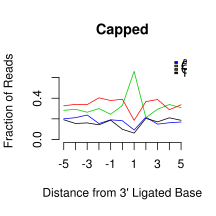

In [3]:
PsBs = GenomicRanges::resize(Pooled[Pooled$C>0], width=1, fix="end");
# we want to plot 5 nt upstream of the run-on base, and 5 nt downstream
# so that is 5 + run-on + 5 = 11 nucleotides total
flank3 = GenomicRanges::promoters(PsBs[1:10^6], upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='Capped', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

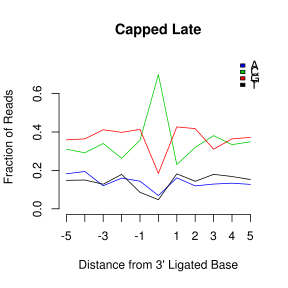

In [4]:
PsBs = GenomicRanges::resize(Pooled[Pooled$C>0 & Pooled$ID5 %in% mTSB$ID5[mTSB$PsClass == "Late"]], width=1, fix="end");
PsBs = GenomicRanges::resize(PsBs, width=1, fix="end")
flank3 = GenomicRanges::promoters(PsBs, upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='Capped Late', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

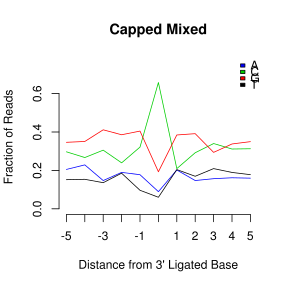

In [5]:
PsBs = GenomicRanges::resize(Pooled[Pooled$C>0 & Pooled$ID5 %in% mTSB$ID5[mTSB$PsClass == "Both"]], width=1, fix="end");
PsBs = GenomicRanges::resize(PsBs, width=1, fix="end")
flank3 = GenomicRanges::promoters(PsBs, upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='Capped Mixed', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

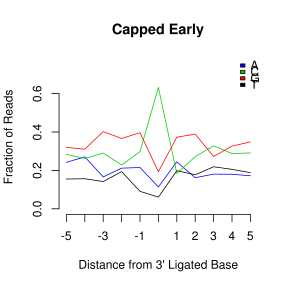

In [6]:
PsBs = GenomicRanges::resize(Pooled[Pooled$C>0 & Pooled$ID5 %in% mTSB$ID5[mTSB$PsClass == "Early"]], width=1, fix="end");
PsBs = GenomicRanges::resize(PsBs, width=1, fix="end")
flank3 = GenomicRanges::promoters(PsBs, upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='Capped Early', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 4 out-of-bound ranges located on sequence chrM.
  Note that only ranges located on a non-circular sequence whose length
  is not NA can be considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 4 out-of-bound ranges located on sequence chrM.
  Note that only ranges located on a non-circular sequence whose length
  is not NA can be considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim =

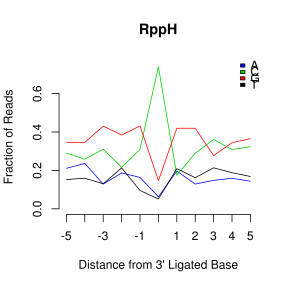

In [7]:
PsBs = GenomicRanges::resize(Pooled[Pooled$R>0], width=1, fix="end");
PsBs = GenomicRanges::resize(PsBs, width=1, fix="end")
flank3 = GenomicRanges::promoters(PsBs, upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='RppH', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 14 out-of-bound ranges located on sequence
  chrM. Note that only ranges located on a non-circular sequence whose
  length is not NA can be considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 14 out-of-bound ranges located on sequence
  chrM. Note that only ranges located on a non-circular sequence whose
  length is not NA can be considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim

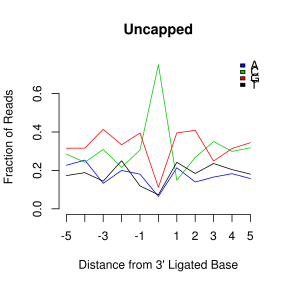

In [8]:
PsBs = GenomicRanges::resize(Pooled[Pooled$U>0], width=1, fix="end");
PsBs = GenomicRanges::resize(PsBs, width=1, fix="end")
flank3 = GenomicRanges::promoters(PsBs, upstream=5, downstream=6);
flank3 = flank3[ sample(1:length(flank3), 10^5, prob=flank3$C/sum(flank3$C), replace=T) ];
## NOTE: import.2bit ignores strand, so we must manually complement the sequence.
seq3 = import.2bit(genomef, which=flank3);
seq3[ strand(flank3) == '-' ] = reverseComplement(seq3[ strand(flank3) == '-' ]);

molbc = strsplit(as.character(seq3), NULL);
bcount = lapply(molbc, countbases);
bsums = Reduce(`+`, bcount);
bfreqs = t(bsums)*1E-5

matplot(bfreqs, type='l', lty=1, pch=1, col=4:1, ylim=c(0, 0.75),
    main='Uncapped', ylab='Fraction of Reads',
    xlab="Distance from 3' Ligated Base", axes=F
);
axis(2);
axis(side=1, at=1:nrow(bfreqs), labels=-5:5)
legend("topright", legend=c('A','C','G','T'), fill=4:1, bty='n');

In [9]:
# compute percent of reads from each library mapping to TSBs
print(100*sum(sTSB$C)/sum(Pooled$C))
print(100*sum(sTSB$U)/sum(Pooled$U))
print(100*sum(sTSB$R)/sum(Pooled$R))
print(100*sum(sTSB$E)/sum(Pooled$E))

[1] 39.56806
[1] 0.2581105
[1] 12.82142
[1] 9.611664
